# Chicago Crashes: Phase 3 Project

### Jesse Markowitz working notebook

## Stakeholders & Main Problem

Our stakeholder will be the City of Chicago. We'll focus on identifying the factors that most contribute to an increasing severity of crashes (fatalities, serious injury). 

We'll look closely at the columns associated with fatalities and injuries to create targets for this multi-class problem.

## Import datasets & poke around

Datasets located at:
 - https://data.cityofchicago.org/Transportation/Traffic-Crashes-Crashes/85ca-t3if
 - https://data.cityofchicago.org/Transportation/Traffic-Crashes-Vehicles/68nd-jvt3
 - https://data.cityofchicago.org/Transportation/Traffic-Crashes-People/u6pd-qa9d

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
crashes_df = pd.read_csv('./data/Traffic_Crashes_-_Crashes.csv')
people_df = pd.read_csv('./data/Traffic_Crashes_-_People.csv')
# vehicles_df = pd.read_csv('./data/Traffic_Crashes_-_Vehicles.csv')

/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3145: DtypeWarning: Columns (33) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,
/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3145: DtypeWarning: Columns (12,13,20,21,22,23,24,25,26,27,29) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [3]:
crashes_df.head()

,CRASH_RECORD_ID,RD_NO,CRASH_DATE_EST_I,CRASH_DATE,POSTED_SPEED_LIMIT,TRAFFIC_CONTROL_DEVICE,DEVICE_CONDITION,WEATHER_CONDITION,LIGHTING_CONDITION,FIRST_CRASH_TYPE,...,INJURIES_NON_INCAPACITATING,INJURIES_REPORTED_NOT_EVIDENT,INJURIES_NO_INDICATION,INJURIES_UNKNOWN,CRASH_HOUR,CRASH_DAY_OF_WEEK,CRASH_MONTH,LATITUDE,LONGITUDE,LOCATION
0,4fd0a3e0897b3335b94cd8d5b2d2b350eb691add56c62d...,JC343143,NaN,07/10/2019 05:56:00 PM,35,NO CONTROLS,NO CONTROLS,CLEAR,DAYLIGHT,TURNING,...,0.0,0.0,3.0,0.0,17,4,7,41.919664,-87.773288,POINT (-87.773287883007 41.919663832993)
1,009e9e67203442370272e1a13d6ee51a4155dac65e583d...,JA329216,NaN,06/30/2017 04:00:00 PM,35,STOP SIGN/FLASHER,FUNCTIONING PROPERLY,CLEAR,DAYLIGHT,TURNING,...,0.0,0.0,3.0,0.0,16,6,6,41.741804,-87.740954,POINT (-87.740953581987 41.741803598989)
2,ee9283eff3a55ac50ee58f3d9528ce1d689b1c4180b4c4...,JD292400,NaN,07/10/2020 10:25:00 AM,30,TRAFFIC SIGNAL,FUNCTIONING PROPERLY,CLEAR,DAYLIGHT,REAR END,...,0.0,0.0,3.0,0.0,10,6,7,41.773456,-87.585022,POINT (-87.585022352022 41.773455972008)
3,f8960f698e870ebdc60b521b2a141a5395556bc3704191...,JD293602,NaN,07/11/2020 01:00:00 AM,30,NO CONTROLS,NO CONTROLS,CLEAR,DARKNESS,PARKED MOTOR VEHICLE,...,0.0,0.0,3.0,0.0,1,7,7,41.802119,-87.622115,POINT (-87.622114914961 41.802118543011)
4,8eaa2678d1a127804ee9b8c35ddf7d63d913c14eda61d6...,JD290451,NaN,07/08/2020 02:00:00 PM,20,NO CONTROLS,NO CONTROLS,CLEAR,DAYLIGHT,PARKED MOTOR VEHICLE,...,0.0,0.0,1.0,0.0,14,4,7,NaN,NaN,NaN


In [4]:
# From Angie: create a df to show % of missing values from another df:

# percent_missing = df.isnull().sum() * 100 / len(df)
# missing_value_df = pd.DataFrame({'column_name': df.columns,
#                                  'percent_missing': percent_missing})

# pd.set_option('display.max_rows', None)
# missing_value_df

In [5]:
crashes_df.isna().mean()

CRASH_RECORD_ID                  0.000000
RD_NO                            0.008486
CRASH_DATE_EST_I                 0.924181
CRASH_DATE                       0.000000
POSTED_SPEED_LIMIT               0.000000
TRAFFIC_CONTROL_DEVICE           0.000000
DEVICE_CONDITION                 0.000000
WEATHER_CONDITION                0.000000
LIGHTING_CONDITION               0.000000
FIRST_CRASH_TYPE                 0.000000
TRAFFICWAY_TYPE                  0.000000
LANE_CNT                         0.632318
ALIGNMENT                        0.000000
ROADWAY_SURFACE_COND             0.000000
ROAD_DEFECT                      0.000000
REPORT_TYPE                      0.024997
CRASH_TYPE                       0.000000
INTERSECTION_RELATED_I           0.773254
NOT_RIGHT_OF_WAY_I               0.952689
HIT_AND_RUN_I                    0.698892
DAMAGE                           0.000000
DATE_POLICE_NOTIFIED             0.000000
PRIM_CONTRIBUTORY_CAUSE          0.000000
SEC_CONTRIBUTORY_CAUSE           0

In [6]:
crashes_df.loc[crashes_df.PRIM_CONTRIBUTORY_CAUSE == 'UNABLE TO DETERMINE'].NUM_UNITS.value_counts()

2.0     178933
1.0      11661
3.0       9474
4.0       1856
5.0        446
6.0        102
7.0         40
8.0         10
9.0          9
14.0         2
11.0         1
12.0         1
Name: NUM_UNITS, dtype: int64

In [7]:
people_df.head()

,PERSON_ID,PERSON_TYPE,CRASH_RECORD_ID,RD_NO,VEHICLE_ID,CRASH_DATE,SEAT_NO,CITY,STATE,ZIPCODE,...,EMS_RUN_NO,DRIVER_ACTION,DRIVER_VISION,PHYSICAL_CONDITION,PEDPEDAL_ACTION,PEDPEDAL_VISIBILITY,PEDPEDAL_LOCATION,BAC_RESULT,BAC_RESULT VALUE,CELL_PHONE_USE
0,O749947,DRIVER,81dc0de2ed92aa62baccab641fa377be7feb1cc47e6554...,JC451435,834816.0,09/28/2019 03:30:00 AM,NaN,CHICAGO,IL,60651,...,NaN,UNKNOWN,UNKNOWN,UNKNOWN,NaN,NaN,NaN,TEST NOT OFFERED,NaN,NaN
1,O871921,DRIVER,af84fb5c8d996fcd3aefd36593c3a02e6e7509eeb27568...,JD208731,827212.0,04/13/2020 10:50:00 PM,NaN,CHICAGO,IL,60620,...,NaN,NONE,NOT OBSCURED,NORMAL,NaN,NaN,NaN,TEST NOT OFFERED,NaN,NaN
2,O10018,DRIVER,71162af7bf22799b776547132ebf134b5b438dcf3dac6b...,HY484534,9579.0,11/01/2015 05:00:00 AM,NaN,NaN,NaN,NaN,...,NaN,IMPROPER BACKING,UNKNOWN,UNKNOWN,NaN,NaN,NaN,TEST NOT OFFERED,NaN,NaN
3,O10038,DRIVER,c21c476e2ccc41af550b5d858d22aaac4ffc88745a1700...,HY484750,9598.0,11/01/2015 08:00:00 AM,NaN,NaN,NaN,NaN,...,NaN,UNKNOWN,UNKNOWN,UNKNOWN,NaN,NaN,NaN,TEST NOT OFFERED,NaN,NaN
4,O10039,DRIVER,eb390a4c8e114c69488f5fb8a097fe629f5a92fd528cf4...,HY484778,9600.0,11/01/2015 10:15:00 AM,NaN,NaN,NaN,NaN,...,NaN,UNKNOWN,UNKNOWN,UNKNOWN,NaN,NaN,NaN,TEST NOT OFFERED,NaN,NaN


In [8]:
people_df.isna().mean()

PERSON_ID                0.000000
PERSON_TYPE              0.000000
CRASH_RECORD_ID          0.000000
RD_NO                    0.008475
VEHICLE_ID               0.019737
CRASH_DATE               0.000000
SEAT_NO                  0.795515
CITY                     0.264286
STATE                    0.255537
ZIPCODE                  0.328293
SEX                      0.015122
AGE                      0.287098
DRIVERS_LICENSE_STATE    0.409957
DRIVERS_LICENSE_CLASS    0.491509
SAFETY_EQUIPMENT         0.002918
AIRBAG_DEPLOYED          0.018905
EJECTION                 0.012161
INJURY_CLASSIFICATION    0.000496
HOSPITAL                 0.820056
EMS_AGENCY               0.886213
EMS_RUN_NO               0.981366
DRIVER_ACTION            0.206386
DRIVER_VISION            0.206662
PHYSICAL_CONDITION       0.205814
PEDPEDAL_ACTION          0.981416
PEDPEDAL_VISIBILITY      0.981456
PEDPEDAL_LOCATION        0.981417
BAC_RESULT               0.205471
BAC_RESULT VALUE         0.998735
CELL_PHONE_USE

In [9]:
people_df.INJURY_CLASSIFICATION.value_counts()

NO INDICATION OF INJURY     1096283
NONINCAPACITATING INJURY      55296
REPORTED, NOT EVIDENT         32092
INCAPACITATING INJURY         10827
FATAL                           656
Name: INJURY_CLASSIFICATION, dtype: int64

In [10]:
# vehicles_df.head()

In [11]:
# vehicles_df.isna().mean()

## EDA

**Crashes:**

For purposes of EDA, we drop columns for which the distribution isn't relevant/informative.

In [12]:
crashes_df.columns

Index(['CRASH_RECORD_ID', 'RD_NO', 'CRASH_DATE_EST_I', 'CRASH_DATE',
       'POSTED_SPEED_LIMIT', 'TRAFFIC_CONTROL_DEVICE', 'DEVICE_CONDITION',
       'WEATHER_CONDITION', 'LIGHTING_CONDITION', 'FIRST_CRASH_TYPE',
       'TRAFFICWAY_TYPE', 'LANE_CNT', 'ALIGNMENT', 'ROADWAY_SURFACE_COND',
       'ROAD_DEFECT', 'REPORT_TYPE', 'CRASH_TYPE', 'INTERSECTION_RELATED_I',
       'NOT_RIGHT_OF_WAY_I', 'HIT_AND_RUN_I', 'DAMAGE', 'DATE_POLICE_NOTIFIED',
       'PRIM_CONTRIBUTORY_CAUSE', 'SEC_CONTRIBUTORY_CAUSE', 'STREET_NO',
       'STREET_DIRECTION', 'STREET_NAME', 'BEAT_OF_OCCURRENCE',
       'PHOTOS_TAKEN_I', 'STATEMENTS_TAKEN_I', 'DOORING_I', 'WORK_ZONE_I',
       'WORK_ZONE_TYPE', 'WORKERS_PRESENT_I', 'NUM_UNITS',
       'MOST_SEVERE_INJURY', 'INJURIES_TOTAL', 'INJURIES_FATAL',
       'INJURIES_INCAPACITATING', 'INJURIES_NON_INCAPACITATING',
       'INJURIES_REPORTED_NOT_EVIDENT', 'INJURIES_NO_INDICATION',
       'INJURIES_UNKNOWN', 'CRASH_HOUR', 'CRASH_DAY_OF_WEEK', 'CRASH_MONTH',
       'LA

In [13]:
crashes_df.describe()

,POSTED_SPEED_LIMIT,LANE_CNT,STREET_NO,BEAT_OF_OCCURRENCE,NUM_UNITS,INJURIES_TOTAL,INJURIES_FATAL,INJURIES_INCAPACITATING,INJURIES_NON_INCAPACITATING,INJURIES_REPORTED_NOT_EVIDENT,INJURIES_NO_INDICATION,INJURIES_UNKNOWN,CRASH_HOUR,CRASH_DAY_OF_WEEK,CRASH_MONTH,LATITUDE,LONGITUDE
count,541142.000000,1.989680e+05,541142.000000,541137.000000,541133.000000,540030.000000,540030.000000,540030.000000,540030.000000,540030.000000,540030.000000,540030.0,541142.000000,541142.000000,541142.000000,538026.000000,538026.000000
mean,28.311768,1.333232e+01,3664.599116,1238.230646,2.033955,0.180671,0.001094,0.019730,0.101009,0.058837,2.019149,0.0,13.249556,4.127115,6.621290,41.854746,-87.672871
std,6.414913,2.961906e+03,2909.611349,706.865005,0.447292,0.552669,0.035858,0.164441,0.410387,0.311525,1.168443,0.0,5.518619,1.978387,3.373203,0.338869,0.689157
min,0.000000,0.000000e+00,0.000000,111.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,1.000000,1.000000,0.000000,-87.935877
25%,30.000000,2.000000e+00,1217.000000,712.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.0,9.000000,2.000000,4.000000,41.781544,-87.721205
50%,30.000000,2.000000e+00,3199.000000,1135.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.0,14.000000,4.000000,7.000000,41.875126,-87.673362
75%,30.000000,4.000000e+00,5599.000000,1822.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.0,17.000000,6.000000,9.000000,41.923972,-87.632793
max,99.000000,1.191625e+06,451100.000000,6100.000000,18.000000,21.000000,4.000000,7.000000,21.000000,15.000000,61.000000,0.0,23.000000,7.000000,12.000000,42.022780,0.000000


In [14]:
crashes_df.INJURIES_UNKNOWN.value_counts()

0.0    540030
Name: INJURIES_UNKNOWN, dtype: int64

In [15]:
crashes_eda = crashes_df.drop(['CRASH_RECORD_ID', 'RD_NO', 'CRASH_DATE_EST_I', 'CRASH_DATE', 
                               'REPORT_TYPE', 'STREET_NO', 'STREET_DIRECTION', 'STREET_NAME',
                               'PHOTOS_TAKEN_I', 'STATEMENTS_TAKEN_I', 'INJURIES_UNKNOWN', 
                               'LATITUDE', 'LONGITUDE', 'LOCATION'], axis=1)

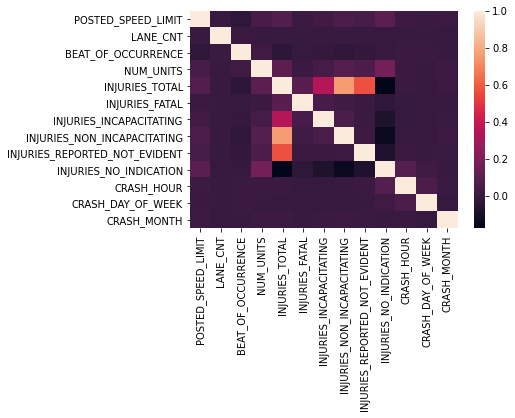

In [16]:
# Are certain factors correlated with severity of injuries?
sns.heatmap(crashes_eda.corr());

Looks like there aren't any standout features that correlate strongly (or at all!) with any count of injuries (of any severity). Surprising...

In [17]:
crashes_eda.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541142 entries, 0 to 541141
Data columns (total 35 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   POSTED_SPEED_LIMIT             541142 non-null  int64  
 1   TRAFFIC_CONTROL_DEVICE         541142 non-null  object 
 2   DEVICE_CONDITION               541142 non-null  object 
 3   WEATHER_CONDITION              541142 non-null  object 
 4   LIGHTING_CONDITION             541142 non-null  object 
 5   FIRST_CRASH_TYPE               541142 non-null  object 
 6   TRAFFICWAY_TYPE                541142 non-null  object 
 7   LANE_CNT                       198968 non-null  float64
 8   ALIGNMENT                      541142 non-null  object 
 9   ROADWAY_SURFACE_COND           541142 non-null  object 
 10  ROAD_DEFECT                    541142 non-null  object 
 11  CRASH_TYPE                     541142 non-null  object 
 12  INTERSECTION_RELATED_I        

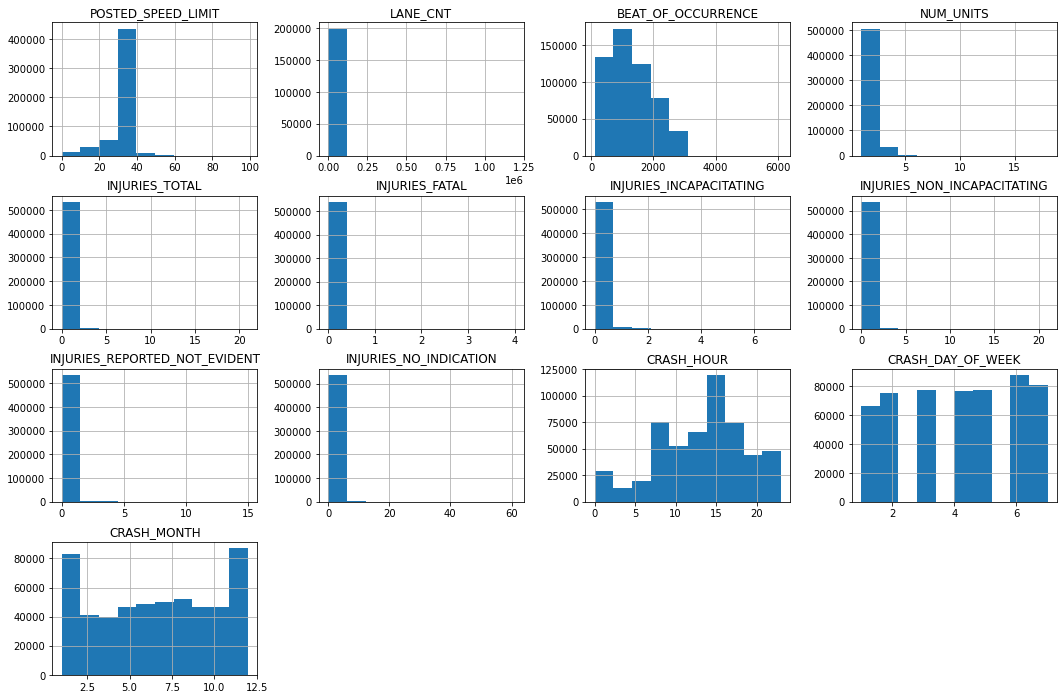

In [18]:
crashes_eda.hist(figsize=(18, 12));

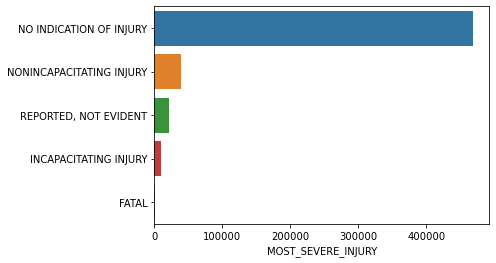

In [19]:
sns.barplot(y=crashes_eda.MOST_SEVERE_INJURY.value_counts().index, x=crashes_eda.MOST_SEVERE_INJURY.value_counts(),
           orient='h');

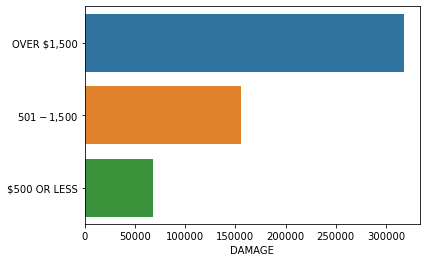

In [20]:
sns.barplot(y=crashes_eda.DAMAGE.value_counts().index, x=crashes_eda.DAMAGE.value_counts(),
           orient='h');

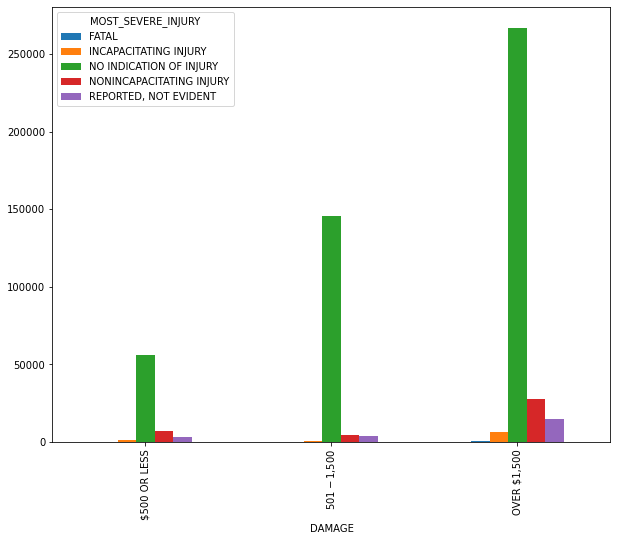

In [21]:
pd.crosstab(crashes_eda.DAMAGE, crashes_eda.MOST_SEVERE_INJURY).plot.bar(figsize=(10, 8));

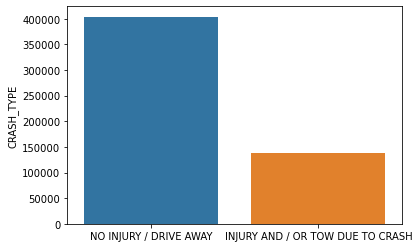

In [22]:
sns.barplot(x=crashes_eda.CRASH_TYPE.value_counts().index, y=crashes_eda.CRASH_TYPE.value_counts());

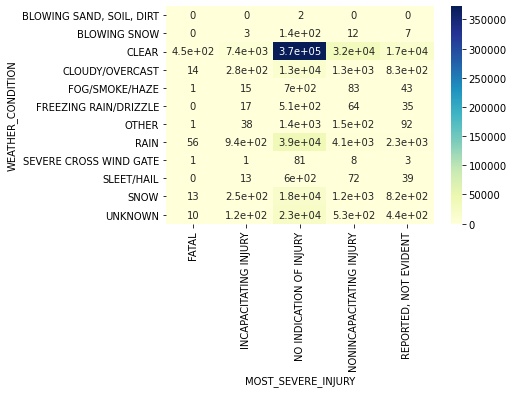

In [23]:
sns.heatmap(pd.crosstab(crashes_eda.WEATHER_CONDITION, 
                        crashes_eda.MOST_SEVERE_INJURY), 
            annot=True, cmap="YlGnBu");

**People:**

Once again, dropping irrelevant/uninformative columns.

In [24]:
people_df.describe()

,VEHICLE_ID,SEAT_NO,AGE,BAC_RESULT VALUE
count,1.172146e+06,244512.000000,852450.000000,1513.000000
mean,5.585351e+05,4.161947,37.809891,0.168156
std,3.217621e+05,2.186146,17.108989,0.101872
min,2.000000e+00,1.000000,-177.000000,0.000000
25%,2.814092e+05,3.000000,25.000000,0.120000
50%,5.577685e+05,3.000000,35.000000,0.170000
75%,8.340698e+05,6.000000,50.000000,0.220000
max,1.121167e+06,12.000000,110.000000,1.000000


In [25]:
people_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1195747 entries, 0 to 1195746
Data columns (total 30 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   PERSON_ID              1195747 non-null  object 
 1   PERSON_TYPE            1195747 non-null  object 
 2   CRASH_RECORD_ID        1195747 non-null  object 
 3   RD_NO                  1185613 non-null  object 
 4   VEHICLE_ID             1172146 non-null  float64
 5   CRASH_DATE             1195747 non-null  object 
 6   SEAT_NO                244512 non-null   float64
 7   CITY                   879728 non-null   object 
 8   STATE                  890189 non-null   object 
 9   ZIPCODE                803192 non-null   object 
 10  SEX                    1177665 non-null  object 
 11  AGE                    852450 non-null   float64
 12  DRIVERS_LICENSE_STATE  705542 non-null   object 
 13  DRIVERS_LICENSE_CLASS  608027 non-null   object 
 14  SAFETY_EQUIPMENT  

In [26]:
people_eda = people_df.drop(['PERSON_ID', 'RD_NO', 'CRASH_RECORD_ID', 'HOSPITAL',
                             'EMS_AGENCY', 'EMS_RUN_NO'], axis=1)

In [27]:
people_eda.BAC_RESULT.value_counts()

TEST NOT OFFERED                   935453
TEST REFUSED                        10368
TEST PERFORMED, RESULTS UNKNOWN      2422
TEST TAKEN                           1813
Name: BAC_RESULT, dtype: int64

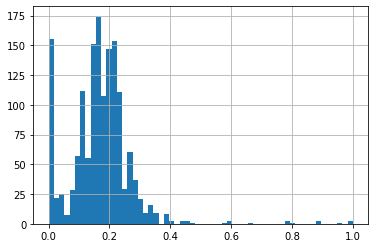

In [28]:
people_eda['BAC_RESULT VALUE'].hist(bins='auto');

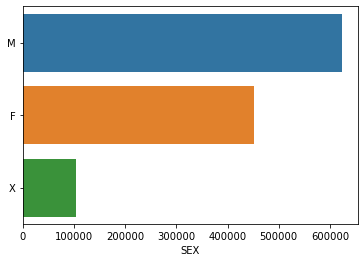

In [29]:
sns.barplot(y=people_eda.SEX.value_counts().index, x=people_eda.SEX.value_counts(),
           orient='h');

What's with ages less than 0???

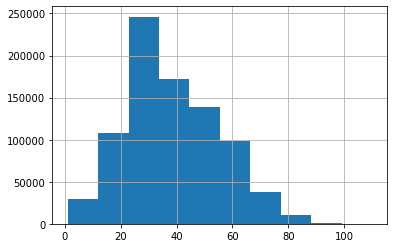

In [30]:
people_eda[people_eda['AGE'] > 0]['AGE'].hist();

In [31]:
people_eda['AGE_BINS'] = pd.cut(x=people_eda['AGE'], bins=[16, 19, 29, 39, 49, 59, 69, 79, 89, 99])

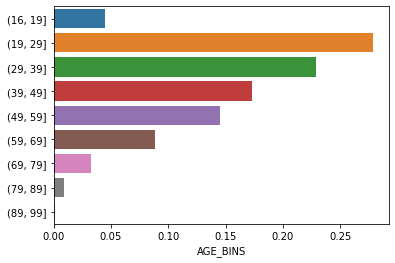

In [32]:
sns.barplot(y=people_eda.AGE_BINS.value_counts(normalize=True).index, x=people_eda.AGE_BINS.value_counts(normalize=True),
           orient='h');

In [33]:
pd.crosstab(people_eda.AGE_BINS, people_eda.INJURY_CLASSIFICATION)

INJURY_CLASSIFICATION,FATAL,INCAPACITATING INJURY,NO INDICATION OF INJURY,NONINCAPACITATING INJURY,"REPORTED, NOT EVIDENT"
AGE_BINS,,,,,
"(16, 19]",21,504,30978,2910,1429
"(19, 29]",150,2660,196435,14489,7844
"(29, 39]",116,1972,163628,10231,6019
"(39, 49]",79,1375,124801,6957,4369
"(49, 59]",68,1353,103692,6145,4006
"(59, 69]",52,907,63066,3984,2404
"(69, 79]",25,386,23308,1481,798
"(79, 89]",17,126,6389,468,231
"(89, 99]",4,15,720,58,23


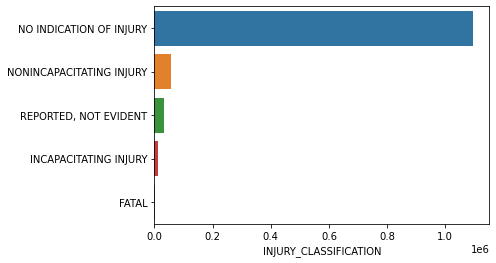

In [34]:
sns.barplot(y=people_eda.INJURY_CLASSIFICATION.value_counts().index, x=people_eda.INJURY_CLASSIFICATION.value_counts(),
           orient='h');

In [35]:
pd.crosstab(people_eda.SEX, people_eda.INJURY_CLASSIFICATION)

INJURY_CLASSIFICATION,FATAL,INCAPACITATING INJURY,NO INDICATION OF INJURY,NONINCAPACITATING INJURY,"REPORTED, NOT EVIDENT"
SEX,,,,,
F,166,4640,403662,26255,16890
M,477,6003,573458,28189,14724
X,4,57,102744,171,93


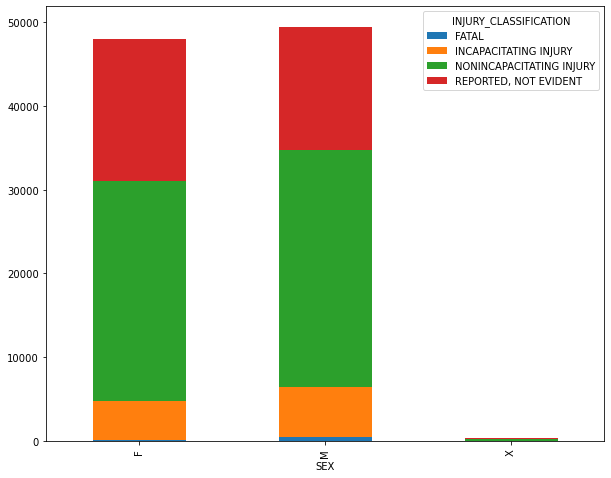

In [36]:
ct = pd.crosstab(people_eda.SEX, people_eda.INJURY_CLASSIFICATION).drop('NO INDICATION OF INJURY', axis=1)
ct.plot.bar(stacked=True, figsize=(10, 8));

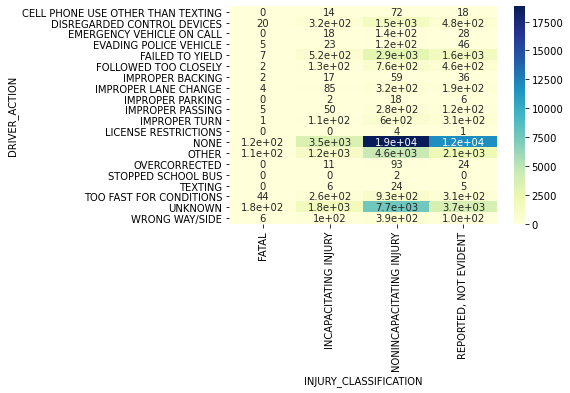

In [37]:
sns.heatmap(pd.crosstab(people_eda.DRIVER_ACTION, people_eda.INJURY_CLASSIFICATION).drop('NO INDICATION OF INJURY', axis=1),
            annot=True, cmap="YlGnBu");

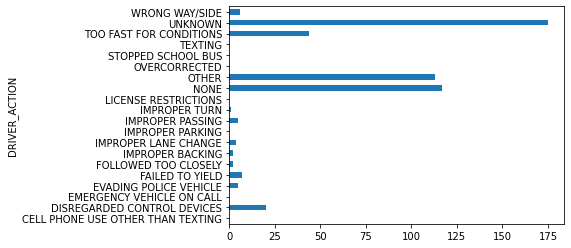

In [38]:
pd.crosstab(people_eda.DRIVER_ACTION, people_eda.INJURY_CLASSIFICATION)['FATAL'].plot.barh();

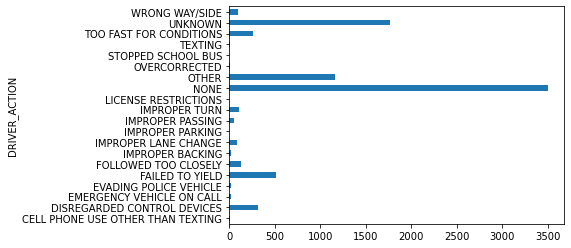

In [39]:
pd.crosstab(people_eda.DRIVER_ACTION, people_eda.INJURY_CLASSIFICATION)['INCAPACITATING INJURY'].plot.barh();

## Dropping columns/basic cleaning

####  First with `.isna().mean()`>80%

In [40]:
def dropna_columns(df, threshold=.8):
    '''
    Drop columns from a Pandas DataFrame in which more than a certain
    percentage (default=80%) of their rows are null/NaN.
    '''
    return df.dropna(thresh=(((1-threshold) * df.shape[0])) + 1, axis=1)

In [41]:
crashes_dropped_df = dropna_columns(crashes_df)
# vehicles_dropped_df = dropna_columns(vehicles_df)
people_dropped_df = dropna_columns(people_df)

In [42]:
crashes_dropped_df.shape

(541142, 41)

In [43]:
# vehicles_dropped_df.shape

In [44]:
people_dropped_df.shape

(1195747, 22)

In [45]:
crashes_dropped_df.columns

Index(['CRASH_RECORD_ID', 'RD_NO', 'CRASH_DATE', 'POSTED_SPEED_LIMIT',
       'TRAFFIC_CONTROL_DEVICE', 'DEVICE_CONDITION', 'WEATHER_CONDITION',
       'LIGHTING_CONDITION', 'FIRST_CRASH_TYPE', 'TRAFFICWAY_TYPE', 'LANE_CNT',
       'ALIGNMENT', 'ROADWAY_SURFACE_COND', 'ROAD_DEFECT', 'REPORT_TYPE',
       'CRASH_TYPE', 'INTERSECTION_RELATED_I', 'HIT_AND_RUN_I', 'DAMAGE',
       'DATE_POLICE_NOTIFIED', 'PRIM_CONTRIBUTORY_CAUSE',
       'SEC_CONTRIBUTORY_CAUSE', 'STREET_NO', 'STREET_DIRECTION',
       'STREET_NAME', 'BEAT_OF_OCCURRENCE', 'NUM_UNITS', 'MOST_SEVERE_INJURY',
       'INJURIES_TOTAL', 'INJURIES_FATAL', 'INJURIES_INCAPACITATING',
       'INJURIES_NON_INCAPACITATING', 'INJURIES_REPORTED_NOT_EVIDENT',
       'INJURIES_NO_INDICATION', 'INJURIES_UNKNOWN', 'CRASH_HOUR',
       'CRASH_DAY_OF_WEEK', 'CRASH_MONTH', 'LATITUDE', 'LONGITUDE',
       'LOCATION'],
      dtype='object')

In [46]:
# vehicles_dropped_df.columns

In [47]:
people_dropped_df.columns

Index(['PERSON_ID', 'PERSON_TYPE', 'CRASH_RECORD_ID', 'RD_NO', 'VEHICLE_ID',
       'CRASH_DATE', 'SEAT_NO', 'CITY', 'STATE', 'ZIPCODE', 'SEX', 'AGE',
       'DRIVERS_LICENSE_STATE', 'DRIVERS_LICENSE_CLASS', 'SAFETY_EQUIPMENT',
       'AIRBAG_DEPLOYED', 'EJECTION', 'INJURY_CLASSIFICATION', 'DRIVER_ACTION',
       'DRIVER_VISION', 'PHYSICAL_CONDITION', 'BAC_RESULT'],
      dtype='object')

In [48]:
people_dropped_df.SEAT_NO.value_counts()

3.0     118468
6.0      41772
4.0      32990
5.0      11585
1.0      10461
2.0       9784
12.0      6193
7.0       5581
10.0      5323
11.0      2081
8.0        274
Name: SEAT_NO, dtype: int64

####  Next by content we don't want/need

In [49]:
people_dropped_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1195747 entries, 0 to 1195746
Data columns (total 22 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   PERSON_ID              1195747 non-null  object 
 1   PERSON_TYPE            1195747 non-null  object 
 2   CRASH_RECORD_ID        1195747 non-null  object 
 3   RD_NO                  1185613 non-null  object 
 4   VEHICLE_ID             1172146 non-null  float64
 5   CRASH_DATE             1195747 non-null  object 
 6   SEAT_NO                244512 non-null   float64
 7   CITY                   879728 non-null   object 
 8   STATE                  890189 non-null   object 
 9   ZIPCODE                803192 non-null   object 
 10  SEX                    1177665 non-null  object 
 11  AGE                    852450 non-null   float64
 12  DRIVERS_LICENSE_STATE  705542 non-null   object 
 13  DRIVERS_LICENSE_CLASS  608027 non-null   object 
 14  SAFETY_EQUIPMENT  

**Columns to drop:**

Crashes:
 - `RD_NO` is a police ID number, withheld for recent crashes; reduntant w/`CRASH_RECORD_ID`
 - `REPORT_TYPE` not relevant to conditions in a crash
 - `CRASH_DATE` (redundant w/`people_df`)
 - `DATE_POLICE_NOTIFIED`
 - `STREET_NO`, `STREET_DIRECTION`, `STREET_NAME` are all location related; just use lat/long
 - All the `INJURIES_` columns--colinearity issues w/individual injury data

Vehicles:
 - `RD_NO` is a police ID number, withheld for recent crashes; reduntant w/`CRASH_RECORD_ID`
 - `CRASH_DATE` (redundant w/`crashes_df`)
 - `UNIT_NO` is redundant (count of num vehicles in crash)
 - `AREA_01_I` is ??? Totally unclear what this is
 
People:
 - `RD_NO` is a police ID number, withheld for recent crashes; reduntant w/`CRASH_RECORD_ID`
 - `CITY` and `ZIPCODE`; just use `STATE` to determine driver residence

In [50]:
crashes_cols_to_drop = ['CRASH_DATE', 'RD_NO', 'REPORT_TYPE', 'DATE_POLICE_NOTIFIED', 'STREET_NO', 'STREET_DIRECTION', 
                        'STREET_NAME', 'INJURIES_TOTAL', 'INJURIES_FATAL', 'INJURIES_INCAPACITATING',
                        'INJURIES_NON_INCAPACITATING', 'INJURIES_REPORTED_NOT_EVIDENT', 'INJURIES_NO_INDICATION',
                        'INJURIES_UNKNOWN', 'MOST_SEVERE_INJURY']
# vehicles_cols_to_drop = ['RD_NO', 'CRASH_DATE', 'UNIT_NO', 'AREA_01_I']
people_cols_to_drop = ['RD_NO', 'CITY', 'ZIPCODE']

In [51]:
crashes_dropped_df = crashes_dropped_df.drop(crashes_cols_to_drop, axis=1)
# vehicles_dropped_df = vehicles_dropped_df.drop(vehicles_cols_to_drop, axis=1)
people_dropped_df = people_dropped_df.drop(people_cols_to_drop, axis=1)

In [52]:
crashes_dropped_df.shape

(541142, 26)

In [53]:
# vehicles_dropped_df.shape

In [54]:
people_dropped_df.shape

(1195747, 19)

## Merging all the data into one dataframe

Since we are focusing on predicting individual outcomes in crashes, we will merge on `people_dropped_df` in a left join with `crashes_dropped_df` and `vehicles_dropped_df`. This will allow us to create a `TARGET` column based on the injury that each individual person incurred during the crash.

In [55]:
people_crashes_df = people_dropped_df.merge(crashes_dropped_df, on='CRASH_RECORD_ID', how='left')

In [56]:
people_crashes_df.shape

(1195747, 44)

In [57]:
people_crashes_df.columns

Index(['PERSON_ID', 'PERSON_TYPE', 'CRASH_RECORD_ID', 'VEHICLE_ID',
       'CRASH_DATE', 'SEAT_NO', 'STATE', 'SEX', 'AGE', 'DRIVERS_LICENSE_STATE',
       'DRIVERS_LICENSE_CLASS', 'SAFETY_EQUIPMENT', 'AIRBAG_DEPLOYED',
       'EJECTION', 'INJURY_CLASSIFICATION', 'DRIVER_ACTION', 'DRIVER_VISION',
       'PHYSICAL_CONDITION', 'BAC_RESULT', 'POSTED_SPEED_LIMIT',
       'TRAFFIC_CONTROL_DEVICE', 'DEVICE_CONDITION', 'WEATHER_CONDITION',
       'LIGHTING_CONDITION', 'FIRST_CRASH_TYPE', 'TRAFFICWAY_TYPE', 'LANE_CNT',
       'ALIGNMENT', 'ROADWAY_SURFACE_COND', 'ROAD_DEFECT', 'CRASH_TYPE',
       'INTERSECTION_RELATED_I', 'HIT_AND_RUN_I', 'DAMAGE',
       'PRIM_CONTRIBUTORY_CAUSE', 'SEC_CONTRIBUTORY_CAUSE',
       'BEAT_OF_OCCURRENCE', 'NUM_UNITS', 'CRASH_HOUR', 'CRASH_DAY_OF_WEEK',
       'CRASH_MONTH', 'LATITUDE', 'LONGITUDE', 'LOCATION'],
      dtype='object')

In [58]:
people_crashes_df.INJURY_CLASSIFICATION.value_counts()

NO INDICATION OF INJURY     1096283
NONINCAPACITATING INJURY      55296
REPORTED, NOT EVIDENT         32092
INCAPACITATING INJURY         10827
FATAL                           656
Name: INJURY_CLASSIFICATION, dtype: int64

In [59]:
sex_incapac_fatal = pd.crosstab(people_crashes_df.SEX, people_crashes_df.INJURY_CLASSIFICATION)[:2][['FATAL', 'INCAPACITATING INJURY']]

In [60]:
sex_incapac_fatal

INJURY_CLASSIFICATION,FATAL,INCAPACITATING INJURY
SEX,,
F,166,4640
M,477,6003


In [61]:
sex_incapac_fatal_percent = sex_incapac_fatal.copy()

In [62]:
sex_incapac_fatal_percent['FATAL']

SEX
F    166
M    477
Name: FATAL, dtype: int64

In [63]:
sex_incapac_fatal_percent['FATAL'] = sex_incapac_fatal['FATAL'].apply(lambda x: x/sex_incapac_fatal['FATAL'].sum())
sex_incapac_fatal_percent['INCAPACITATING INJURY'] = sex_incapac_fatal['INCAPACITATING INJURY'].apply(lambda x: x/sex_incapac_fatal['INCAPACITATING INJURY'].sum())

In [64]:
sex_incapac_fatal_percent.T

SEX,F,M
INJURY_CLASSIFICATION,,
FATAL,0.258165,0.741835
INCAPACITATING INJURY,0.435967,0.564033


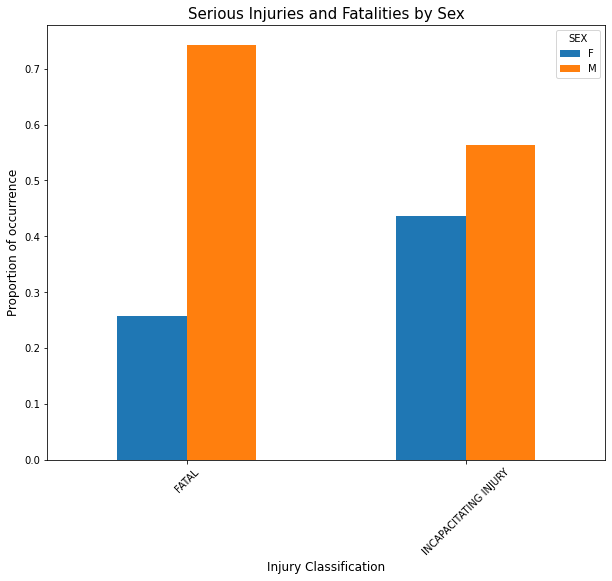

In [65]:
fig, ax = plt.subplots(figsize=(10, 8))
sex_incapac_fatal_percent.T.plot.bar(ax=ax)
plt.title('Serious Injuries and Fatalities by Sex', size=15)
plt.ylabel('Proportion of occurrence', size=12)
plt.xlabel('Injury Classification', size=12)
plt.xticks(rotation = 45);

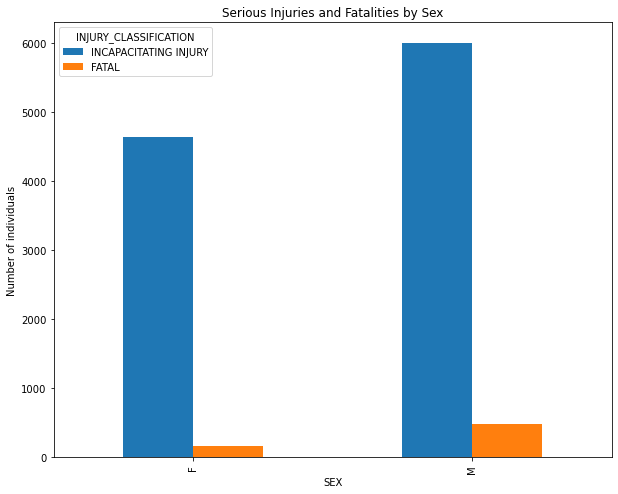

In [172]:
fig, ax = plt.subplots(figsize=(10, 8))
ax = pd.crosstab(people_crashes_df.SEX, 
                 people_crashes_df.INJURY_CLASSIFICATION)[:2][['INCAPACITATING INJURY', 'FATAL']].plot.bar(ax=ax)
plt.title('Serious Injuries and Fatalities by Sex')
plt.ylabel('Number of individuals');

In [173]:
pd.crosstab(people_crashes_df.SEX, people_crashes_df.INJURY_CLASSIFICATION)[:2]

INJURY_CLASSIFICATION,FATAL,INCAPACITATING INJURY,NO INDICATION OF INJURY,NONINCAPACITATING INJURY,"REPORTED, NOT EVIDENT"
SEX,,,,,
F,166,4640,403662,26255,16890
M,477,6003,573458,28189,14724


In [174]:
injuries_by_sex = pd.crosstab(people_crashes_df.SEX, people_crashes_df.INJURY_CLASSIFICATION)[:2]
injuries_by_sex

INJURY_CLASSIFICATION,FATAL,INCAPACITATING INJURY,NO INDICATION OF INJURY,NONINCAPACITATING INJURY,"REPORTED, NOT EVIDENT"
SEX,,,,,
F,166,4640,403662,26255,16890
M,477,6003,573458,28189,14724


In [175]:
def combine_minor_injuries(crosstab_df):
    '''
    Combine 'NONINCAPACITATING INJURY' column with 'REPORTED, NOT EVIDENT'
    to create one 'NONINCAPACITATING INJURY' column, then drop 'REPORTED, NOT EVIDENT'.
    '''
    crosstab_df_copy = crosstab_df.copy()
    crosstab_df_copy['NONINCAPACITATING INJURY'] = crosstab_df_copy['NONINCAPACITATING INJURY'] + crosstab_df_copy['REPORTED, NOT EVIDENT']
    crosstab_df_copy.drop(['REPORTED, NOT EVIDENT'], axis=1, inplace=True)
    return crosstab_df_copy

In [176]:
def normalize_data(crosstab_df):
    '''
    Normalize values down a column in a dataframe,
    specifically for crosstab dataframes using pd.crosstab()
    '''
    crosstab_df_copy = crosstab_df.copy()
    for col in crosstab_df_copy.columns:
        crosstab_df_copy[col] = crosstab_df_copy[col].apply(lambda x: x/crosstab_df_copy[col].sum())
    return crosstab_df_copy

In [177]:
def reorder_columns(crosstab_df):
    '''
    Order columns in same order as our target classes.
    '''
    crosstab_df_copy = crosstab_df.copy()
    crosstab_df_copy = crosstab_df_copy[['NO INDICATION OF INJURY', 'NONINCAPACITATING INJURY', 'INCAPACITATING INJURY', 'FATAL']]
    return crosstab_df_copy

In [178]:
def process_crosstab_df(crosstab_df):
    '''
    Combine previous three functions to provide a fully reformatted crosstab df,
    then transpose so it's ready for visualization.
    '''
    crosstab_df_copy = crosstab_df.copy()
    crosstab_df_copy = combine_minor_injuries(crosstab_df_copy)
    crosstab_df_copy = normalize_data(crosstab_df_copy)
    crosstab_df_copy = reorder_columns(crosstab_df_copy)
    return crosstab_df_copy.T

In [179]:
injuries_by_sex_norm = process_crosstab_df(injuries_by_sex)
injuries_by_sex_norm

SEX,F,M
INJURY_CLASSIFICATION,,
NO INDICATION OF INJURY,0.413114,0.586886
NONINCAPACITATING INJURY,0.501348,0.498652
INCAPACITATING INJURY,0.435967,0.564033
FATAL,0.258165,0.741835


In [180]:
people_crashes_df.SEX.value_counts(normalize=True)

M    0.528931
F    0.383511
X    0.087557
Name: SEX, dtype: float64

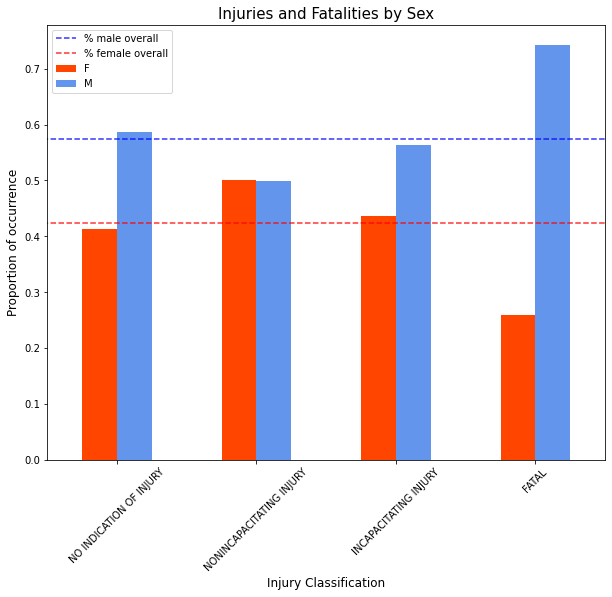

In [181]:
fig, ax = plt.subplots(figsize=(10, 8))
injuries_by_sex_norm.plot.bar(ax=ax, color=('orangered', 'cornflowerblue'))
plt.title('Injuries and Fatalities by Sex', size=15)
plt.ylabel('Proportion of occurrence', size=12)
plt.xlabel('Injury Classification', size=12)
plt.hlines(y=0.574415, xmin=-50, xmax=100, alpha=0.8, color='blue', ls='--', label='% male overall')
plt.hlines(y=0.424224, xmin=-50, xmax=100, alpha=0.8, color='red', ls='--', label='% female overall')
plt.legend()
plt.xticks(rotation = 45)
plt.show()

In [182]:
people_crashes_df.columns

Index(['PERSON_ID', 'PERSON_TYPE', 'CRASH_RECORD_ID', 'VEHICLE_ID',
       'CRASH_DATE', 'SEAT_NO', 'STATE', 'SEX', 'AGE', 'DRIVERS_LICENSE_STATE',
       'DRIVERS_LICENSE_CLASS', 'SAFETY_EQUIPMENT', 'AIRBAG_DEPLOYED',
       'EJECTION', 'INJURY_CLASSIFICATION', 'DRIVER_ACTION', 'DRIVER_VISION',
       'PHYSICAL_CONDITION', 'BAC_RESULT', 'POSTED_SPEED_LIMIT',
       'TRAFFIC_CONTROL_DEVICE', 'DEVICE_CONDITION', 'WEATHER_CONDITION',
       'LIGHTING_CONDITION', 'FIRST_CRASH_TYPE', 'TRAFFICWAY_TYPE', 'LANE_CNT',
       'ALIGNMENT', 'ROADWAY_SURFACE_COND', 'ROAD_DEFECT', 'CRASH_TYPE',
       'INTERSECTION_RELATED_I', 'HIT_AND_RUN_I', 'DAMAGE',
       'PRIM_CONTRIBUTORY_CAUSE', 'SEC_CONTRIBUTORY_CAUSE',
       'BEAT_OF_OCCURRENCE', 'NUM_UNITS', 'CRASH_HOUR', 'CRASH_DAY_OF_WEEK',
       'CRASH_MONTH', 'LATITUDE', 'LONGITUDE', 'LOCATION'],
      dtype='object')

In [183]:
lighting_injuries = pd.crosstab(people_crashes_df.LIGHTING_CONDITION, people_crashes_df.INJURY_CLASSIFICATION)
lighting_injuries

INJURY_CLASSIFICATION,FATAL,INCAPACITATING INJURY,NO INDICATION OF INJURY,NONINCAPACITATING INJURY,"REPORTED, NOT EVIDENT"
LIGHTING_CONDITION,,,,,
DARKNESS,40,506,50229,2466,1306
"DARKNESS, LIGHTED ROAD",333,3442,229530,16396,8043
DAWN,12,253,17548,998,569
DAYLIGHT,250,6240,734852,33220,20830
DUSK,17,301,34701,1816,986
UNKNOWN,4,85,29423,400,358


In [184]:
lighting_injuries_norm = process_crosstab_df(lighting_injuries)
lighting_injuries_norm

LIGHTING_CONDITION,DARKNESS,"DARKNESS, LIGHTED ROAD",DAWN,DAYLIGHT,DUSK,UNKNOWN
INJURY_CLASSIFICATION,,,,,,
NO INDICATION OF INJURY,0.045818,0.209371,0.016007,0.670312,0.031653,0.026839
NONINCAPACITATING INJURY,0.043164,0.279661,0.017932,0.618506,0.032064,0.008674
INCAPACITATING INJURY,0.046735,0.317909,0.023368,0.576337,0.027801,0.007851
FATAL,0.060976,0.507622,0.018293,0.381098,0.025915,0.006098


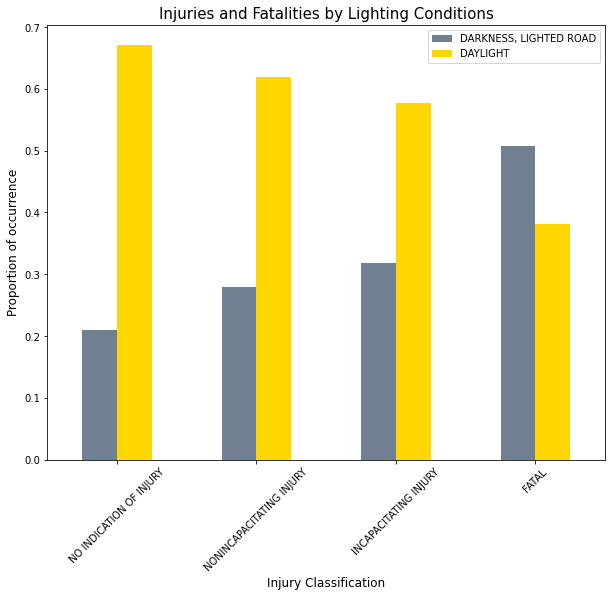

In [185]:
fig, ax = plt.subplots(figsize=(10, 8))
lighting_injuries_norm[['DARKNESS, LIGHTED ROAD', 'DAYLIGHT']].plot.bar(ax=ax, color=('slategray', 'gold'))
plt.title('Injuries and Fatalities by Lighting Conditions', size=15)
plt.ylabel('Proportion of occurrence', size=12)
plt.xlabel('Injury Classification', size=12)
plt.legend()
plt.xticks(rotation = 45);

In [186]:
safety_equip = pd.crosstab(people_crashes_df.SAFETY_EQUIPMENT, 
            people_crashes_df.INJURY_CLASSIFICATION).drop(['USAGE UNKNOWN', 
                                                           'BICYCLE HELMET (PEDACYCLIST INVOLVED ONLY)', 
                                                           'STRETCHER', 'WHEELCHAIR']).T
safety_equip

SAFETY_EQUIPMENT,BOOSTER SEAT,CHILD RESTRAINT - FORWARD FACING,CHILD RESTRAINT - REAR FACING,CHILD RESTRAINT - TYPE UNKNOWN,CHILD RESTRAINT NOT USED,CHILD RESTRAINT USED,CHILD RESTRAINT USED IMPROPERLY,DOT COMPLIANT MOTORCYCLE HELMET,HELMET NOT USED,HELMET USED,NONE PRESENT,NOT DOT COMPLIANT MOTORCYCLE HELMET,SAFETY BELT NOT USED,SAFETY BELT USED,SHOULD/LAP BELT USED IMPROPERLY
INJURY_CLASSIFICATION,,,,,,,,,,,,,,,
FATAL,0,0,0,0,2,1,0,13,34,9,120,2,50,70,0
INCAPACITATING INJURY,5,9,2,7,7,22,3,100,581,152,1838,24,253,3566,1
NO INDICATION OF INJURY,535,2058,1008,1015,469,7269,66,252,1427,486,26529,63,5497,550295,95
NONINCAPACITATING INJURY,25,88,35,69,66,283,14,243,2220,553,6537,34,854,23107,13
"REPORTED, NOT EVIDENT",23,52,34,37,31,240,7,38,466,144,2334,6,328,17888,6


In [187]:
# # Combine child restraint categories
# safety_equip['CHILD RESTRAINT USED PROPERLY'] = safety_equip['CHILD RESTRAINT USED']\
#                                                 + safety_equip['BOOSTER SEAT']\
#                                                 + safety_equip['CHILD RESTRAINT - FORWARD FACING']\
#                                                 + safety_equip['CHILD RESTRAINT - REAR FACING']\
#                                                 + safety_equip['CHILD RESTRAINT - TYPE UNKNOWN']
# safety_equip.drop(['CHILD RESTRAINT USED', 'BOOSTER SEAT', 'CHILD RESTRAINT - FORWARD FACING', 
#                    'CHILD RESTRAINT - REAR FACING', 'CHILD RESTRAINT - TYPE UNKNOWN'], axis=1, inplace=True)

# # Combine motorcycle categories
# safety_equip['MOTORCYCLE HELMET USED PROPERLY'] = safety_equip['HELMET USED']\
#                                          + safety_equip['DOT COMPLIANT MOTORCYCLE HELMET']
# safety_equip['MOTORCYCLE HELMET USED IMPROPERLY'] = safety_equip['NOT DOT COMPLIANT MOTORCYCLE HELMET']\
#                                          + safety_equip['HELMET NOT USED']
# safety_equip['MOTORCYCLE HELMET NOT USED'] = safety_equip['NONE PRESENT']
# safety_equip.drop(['HELMET USED', 'DOT COMPLIANT MOTORCYCLE HELMET', 
#                    'NOT DOT COMPLIANT MOTORCYCLE HELMET', 'NONE PRESENT',
#                    'HELMET NOT USED'], axis=1, inplace=True)

# # Combine safety belt
# safety_equip['SAFETY BELT USED PROPERLY'] = safety_equip['SAFETY BELT USED']
# safety_equip['SAFETY BELT USED IMPROPERLY'] = safety_equip['SHOULD/LAP BELT USED IMPROPERLY']
# safety_equip.drop(['SAFETY BELT USED', 'SHOULD/LAP BELT USED IMPROPERLY'], axis=1, inplace=True)

In [188]:
# # Order columns logically
# safety_equip = safety_equip[['CHILD RESTRAINT USED PROPERLY', 'CHILD RESTRAINT USED IMPROPERLY', 'CHILD RESTRAINT NOT USED', 
#               'MOTORCYCLE HELMET USED PROPERLY', 'MOTORCYCLE HELMET USED IMPROPERLY', 
#               'MOTORCYCLE HELMET NOT USED', 'SAFETY BELT USED PROPERLY', 
#               'SAFETY BELT USED IMPROPERLY', 'SAFETY BELT NOT USED']]

In [189]:
# Combine USED PROPERLY
safety_equip['USED PROPERLY'] = safety_equip['CHILD RESTRAINT USED'] + safety_equip['BOOSTER SEAT']\
                              + safety_equip['CHILD RESTRAINT - FORWARD FACING'] + safety_equip['CHILD RESTRAINT - REAR FACING']\
                              + safety_equip['CHILD RESTRAINT - TYPE UNKNOWN'] + safety_equip['HELMET USED']\
                              + safety_equip['DOT COMPLIANT MOTORCYCLE HELMET'] + safety_equip['SAFETY BELT USED']
# Combine USED IMPROPERLY
safety_equip['USED IMPROPERLY'] = safety_equip['CHILD RESTRAINT USED IMPROPERLY']\
                                + safety_equip['NOT DOT COMPLIANT MOTORCYCLE HELMET']\
                                + safety_equip['SHOULD/LAP BELT USED IMPROPERLY']
# Combine NOT USED
safety_equip['NOT USED'] = safety_equip['CHILD RESTRAINT NOT USED'] + safety_equip['HELMET NOT USED']\
                         + safety_equip['NONE PRESENT'] + safety_equip['SAFETY BELT NOT USED']

In [190]:
safety_equip = safety_equip.loc[:, ['USED PROPERLY', 'NOT USED']]
safety_equip_norm = process_crosstab_df(safety_equip.T)
safety_equip_norm

SAFETY_EQUIPMENT,USED PROPERLY,NOT USED
INJURY_CLASSIFICATION,,
NO INDICATION OF INJURY,0.943164,0.056836
NONINCAPACITATING INJURY,0.769530,0.230470
INCAPACITATING INJURY,0.590492,0.409508
FATAL,0.311037,0.688963


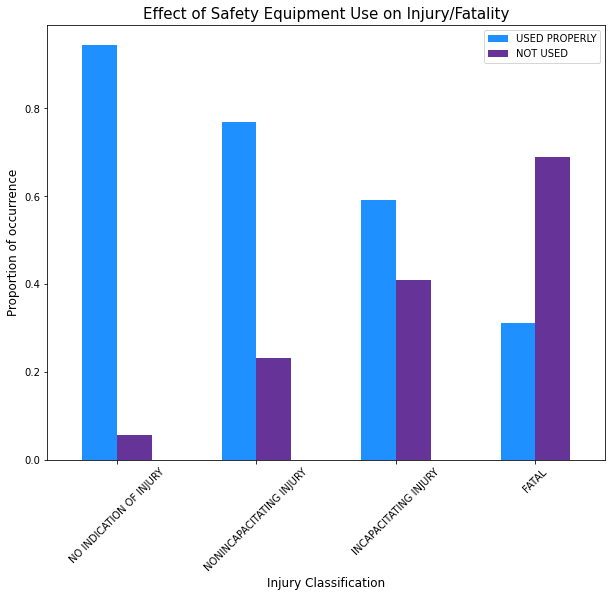

In [191]:
fig, ax = plt.subplots(figsize=(10, 8))
safety_equip_norm.plot.bar(ax=ax, color=('dodgerblue', 'rebeccapurple'))
plt.title('Effect of Safety Equipment Use on Injury/Fatality', size=15)
plt.ylabel('Proportion of occurrence', size=12)
plt.xlabel('Injury Classification', size=12)
plt.legend()
plt.xticks(rotation = 45);

In [283]:
safety_equip_multindex = safety_equip_norm.reset_index()
safety_equip_multindex

INJURY_CLASSIFICATION,SAFETY_EQUIPMENT,FATAL,INCAPACITATING INJURY,NONINCAPACITATING INJURY,"REPORTED, NOT EVIDENT"
0,CHILD RESTRAINT USED PROPERLY,1,34,431,341
1,CHILD RESTRAINT USED IMPROPERLY,0,3,13,6
2,CHILD RESTRAINT NOT USED,2,7,55,28
3,MOTORCYCLE HELMET USED PROPERLY,22,238,762,171
4,MOTORCYCLE HELMET USED IMPROPERLY,34,576,2141,439
5,MOTORCYCLE HELMET NOT USED,109,1725,6118,2127
6,SAFETY BELT USED PROPERLY,63,3283,21322,16546
7,SAFETY BELT USED IMPROPERLY,0,1,13,6
8,SAFETY BELT NOT USED,42,234,777,298


In [284]:
for i in list(safety_equip_norm.index):
    print(' '.join(i.split()[:2]))

CHILD RESTRAINT
CHILD RESTRAINT
CHILD RESTRAINT
MOTORCYCLE HELMET
MOTORCYCLE HELMET
MOTORCYCLE HELMET
SAFETY BELT
SAFETY BELT
SAFETY BELT


In [285]:
safety_equip_multindex['EQUIPMENT TYPE'] = safety_equip_multindex['SAFETY_EQUIPMENT']\
                                          .apply(lambda x: ' '.join(x.split()[:2]))
safety_equip_multindex['SAFETY_EQUIPMENT'] = safety_equip_multindex['SAFETY_EQUIPMENT']\
                                            .apply(lambda x: ' '.join(x.split()[-2:]))
safety_equip_multindex.rename(columns={'SAFETY_EQUIPMENT': 'USAGE'}, inplace=True)
safety_equip_multindex

INJURY_CLASSIFICATION,USAGE,FATAL,INCAPACITATING INJURY,NONINCAPACITATING INJURY,"REPORTED, NOT EVIDENT",EQUIPMENT TYPE
0,USED PROPERLY,1,34,431,341,CHILD RESTRAINT
1,USED IMPROPERLY,0,3,13,6,CHILD RESTRAINT
2,NOT USED,2,7,55,28,CHILD RESTRAINT
3,USED PROPERLY,22,238,762,171,MOTORCYCLE HELMET
4,USED IMPROPERLY,34,576,2141,439,MOTORCYCLE HELMET
5,NOT USED,109,1725,6118,2127,MOTORCYCLE HELMET
6,USED PROPERLY,63,3283,21322,16546,SAFETY BELT
7,USED IMPROPERLY,0,1,13,6,SAFETY BELT
8,NOT USED,42,234,777,298,SAFETY BELT


In [286]:
safety_equip_multindex = safety_equip_multindex.set_index(['EQUIPMENT TYPE','USAGE']).sort_index()
safety_equip_multindex

INJURY_CLASSIFICATION              FATAL  INCAPACITATING INJURY  \
EQUIPMENT TYPE    USAGE                                           
CHILD RESTRAINT   NOT USED             2                      7   
                  USED IMPROPERLY      0                      3   
                  USED PROPERLY        1                     34   
MOTORCYCLE HELMET NOT USED           109                   1725   
                  USED IMPROPERLY     34                    576   
                  USED PROPERLY       22                    238   
SAFETY BELT       NOT USED            42                    234   
                  USED IMPROPERLY      0                      1   
                  USED PROPERLY       63                   3283   

INJURY_CLASSIFICATION              NONINCAPACITATING INJURY  \
EQUIPMENT TYPE    USAGE                                       
CHILD RESTRAINT   NOT USED                               55   
                  USED IMPROPERLY                        13   
                  USED PROPERLY                         431   
MOTORCYCLE HELMET NOT USED                             6118   
                  USED IMPROPERLY                      2141   
                  USED PROPERLY                         762   
SAFETY BELT       NOT USED                              777   
                  USED IMPROPERLY                        13   
                  USED PROPERLY                       21322   

INJURY_CLASSIFICATION              REPORTED, NOT EVIDENT  
EQUIPMENT TYPE    USAGE                                   
CHILD RESTRAINT   NOT USED                            28  
                  USED IMPROPERLY                      6  
                  USED PROPERLY                      341  
MOTORCYCLE HELMET NOT USED                          2127  
                  USED IMPROPERLY                    439  
                  USED PROPERLY                      171  
SAFETY BELT       NOT USED                           298  
                  USED IMPROPERLY                      6  
                  USED PROPERLY                    16546

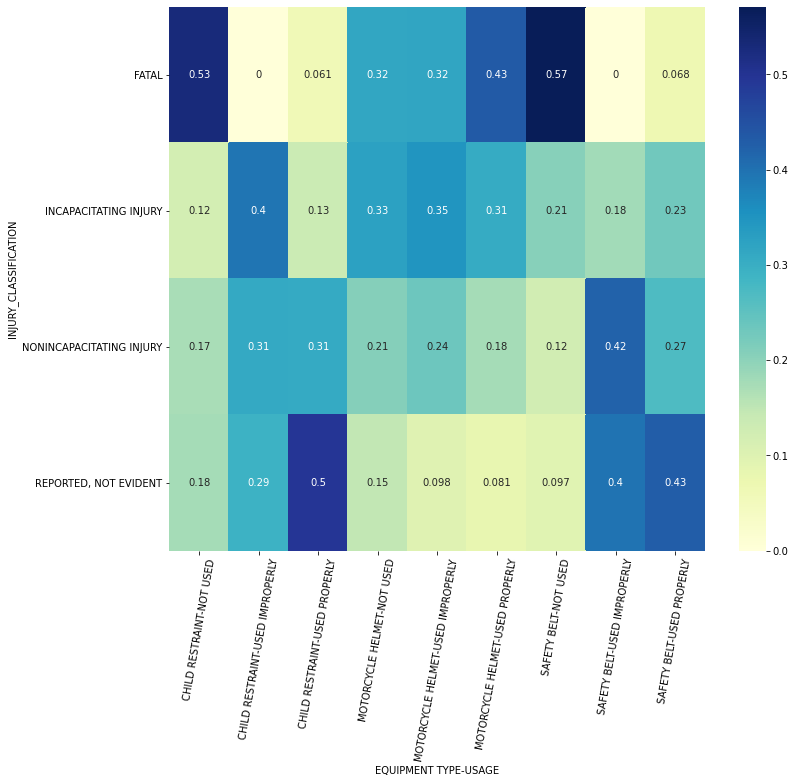

In [311]:
fig, ax = plt.subplots(figsize=(12, 10))
sns.heatmap(normalize_data(safety_equip_multindex.T), annot=True, cmap="YlGnBu", ax=ax)
plt.xticks(rotation=80);

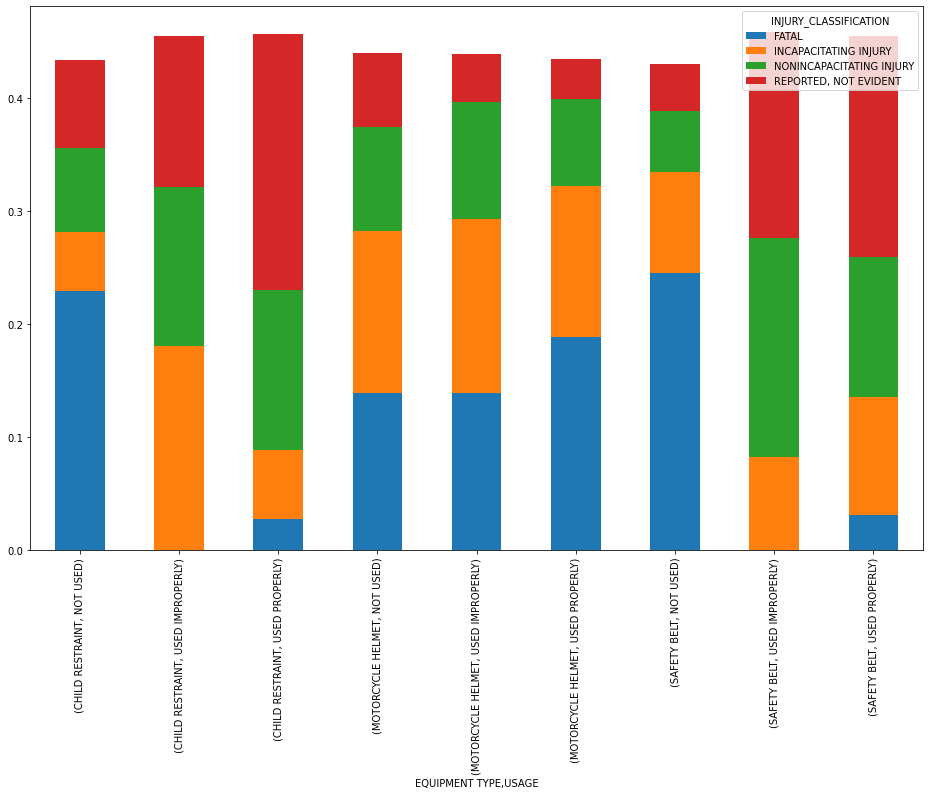

In [310]:
normalize_data(safety_equip_multindex).plot.bar(stacked=True, figsize=(16, 10));

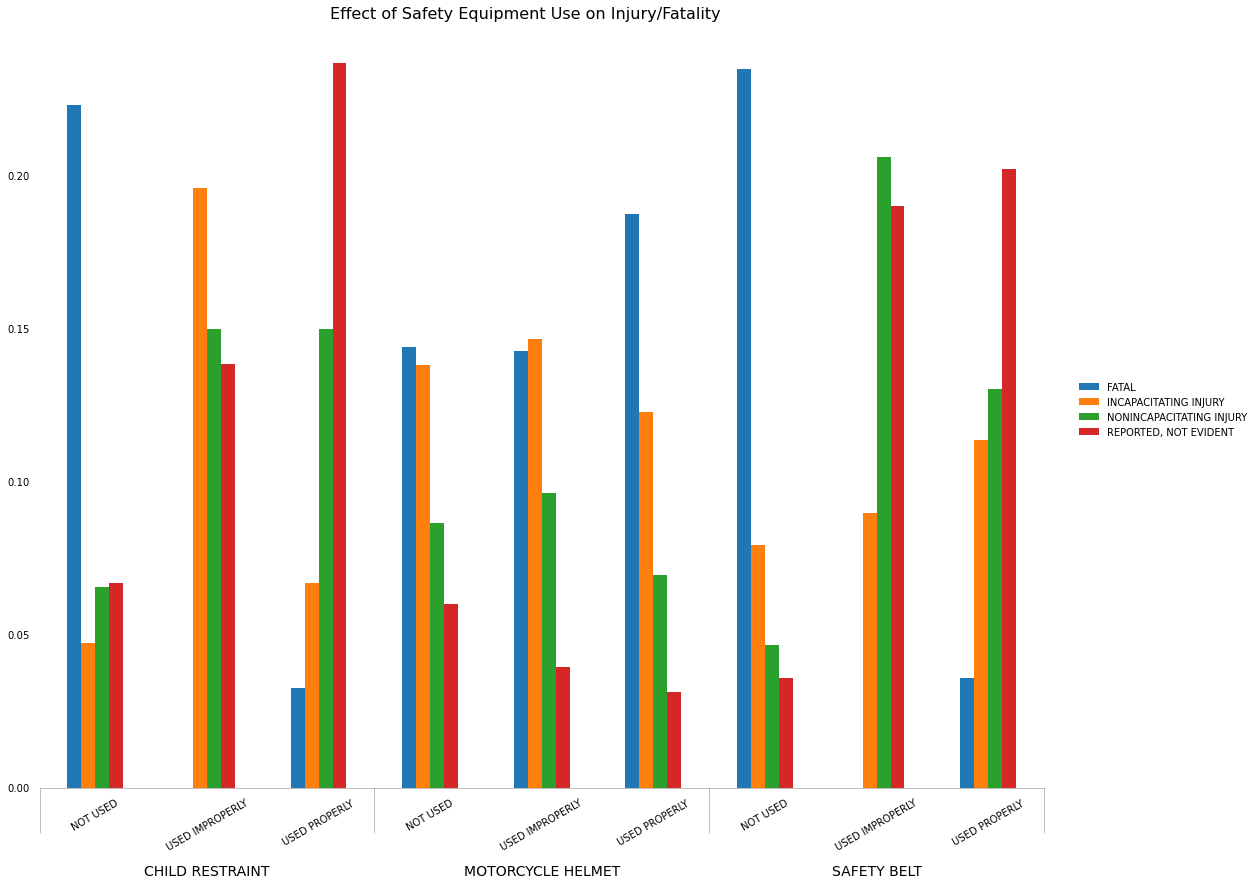

In [308]:
# From: https://www.py4u.net/discuss/153265

# Create figure with a subplot for each group with a relative width that
# is proportional to the number of subgroups
groups = safety_equip_multindex.index.levels[0]
nplots = groups.size
plots_width_ratios = [safety_equip_multindex.xs(group).index.size for group in groups]
fig, axes = plt.subplots(nrows=1, ncols=nplots, sharey=True, figsize=(18, 14),
                         gridspec_kw = dict(width_ratios=plots_width_ratios, wspace=0))

# Loop through array of axes to create grouped bar chart for each group
alpha = 0.3 # used for grid lines, bottom spine and separation lines between groups
for group, ax in zip(groups, axes):
    # Create bar chart with horizontal grid lines and no spines except bottom one
    safety_equip_multindex.xs(group).plot.bar(ax=ax, legend=None, zorder=2)
    # ax.grid(axis='y', zorder=1, color='black', alpha=alpha)
    for spine in ['top', 'left', 'right']:
        ax.spines[spine].set_visible(False)
    ax.spines['bottom'].set_alpha(alpha)
    
    # Set and place x labels for groups
    ax.set_xlabel(group, size=14)
    ax.xaxis.set_label_coords(x=0.5, y=-0.1)
    
    # Format major tick labels for subgroups
    ax.set_xticklabels(ax.get_xticklabels(), rotation=30, ha='center')
    ax.tick_params(axis='both', which='major', length=0, pad=10)
    
    # Set and format minor tick marks for separation lines between groups: note
    # that except for the first subplot, only the right tick mark is drawn to avoid
    # duplicate overlapping lines so that when an alpha different from 1 is chosen
    # (like in this example) all the lines look the same
    if ax.is_first_col():
        ax.set_xticks([*ax.get_xlim()], minor=True)
    else:
        ax.set_xticks([ax.get_xlim()[1]], minor=True)
    ax.tick_params(which='minor', length=45, width=0.8, color=[0, 0, 0, alpha])

# Add legend using the labels and handles from the last subplot
fig.legend(*ax.get_legend_handles_labels(), frameon=False,
           bbox_to_anchor=(0.92, 0.5), loc="center left")
plt.ylabel('Proportion of occurrence')
title = 'Effect of Safety Equipment Use on Injury/Fatality'
fig.suptitle(title, y=0.9, size=16);

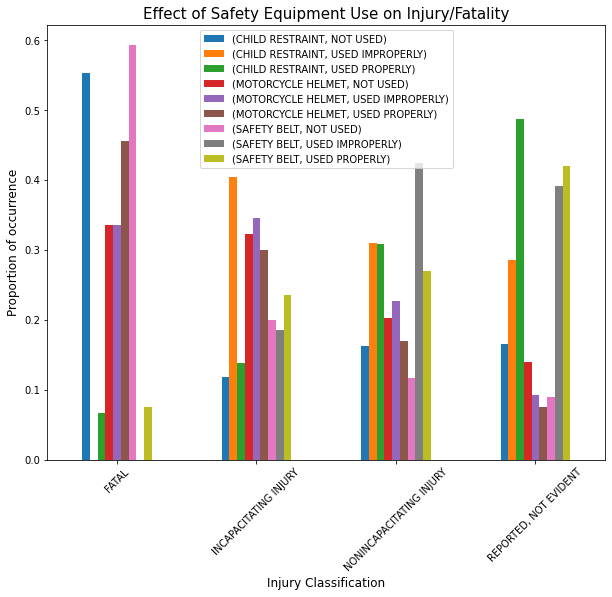

In [309]:
fig, ax = plt.subplots(figsize=(10, 8))
normalize_data(safety_equip_multindex.T).plot.bar(ax=ax)
plt.title('Effect of Safety Equipment Use on Injury/Fatality', size=15)
plt.ylabel('Proportion of occurrence', size=12)
plt.xlabel('Injury Classification', size=12)
plt.legend()
plt.xticks(rotation = 45);

### Create target column

In [66]:
people_crashes_df['TARGET'] = people_crashes_df['INJURY_CLASSIFICATION'].map({np.NaN: 0, 
                                                                              'NO INDICATION OF INJURY': 0, 
                                                                              'NONINCAPACITATING INJURY': 1,
                                                                              'REPORTED, NOT EVIDENT': 1,
                                                                              'INCAPACITATING INJURY': 2,
                                                                              'FATAL': 3})
people_crashes_df['TARGET'].value_counts()

0    1096876
1      87388
2      10827
3        656
Name: TARGET, dtype: int64

**Make a `CRASH_YEAR` columns:**

In [67]:
people_crashes_df['CRASH_YEAR'] = pd.to_datetime(people_crashes_df['CRASH_DATE']).dt.year

In [68]:
people_crashes_df['CRASH_YEAR'].value_counts()

2018    265694
2019    263972
2020    202084
2017    185328
2021    161704
2016     96020
2015     20931
2014        11
2013         3
Name: CRASH_YEAR, dtype: int64

In [69]:
people_crashes_df.columns

Index(['PERSON_ID', 'PERSON_TYPE', 'CRASH_RECORD_ID', 'VEHICLE_ID',
       'CRASH_DATE', 'SEAT_NO', 'STATE', 'SEX', 'AGE', 'DRIVERS_LICENSE_STATE',
       'DRIVERS_LICENSE_CLASS', 'SAFETY_EQUIPMENT', 'AIRBAG_DEPLOYED',
       'EJECTION', 'INJURY_CLASSIFICATION', 'DRIVER_ACTION', 'DRIVER_VISION',
       'PHYSICAL_CONDITION', 'BAC_RESULT', 'POSTED_SPEED_LIMIT',
       'TRAFFIC_CONTROL_DEVICE', 'DEVICE_CONDITION', 'WEATHER_CONDITION',
       'LIGHTING_CONDITION', 'FIRST_CRASH_TYPE', 'TRAFFICWAY_TYPE', 'LANE_CNT',
       'ALIGNMENT', 'ROADWAY_SURFACE_COND', 'ROAD_DEFECT', 'CRASH_TYPE',
       'INTERSECTION_RELATED_I', 'HIT_AND_RUN_I', 'DAMAGE',
       'PRIM_CONTRIBUTORY_CAUSE', 'SEC_CONTRIBUTORY_CAUSE',
       'BEAT_OF_OCCURRENCE', 'NUM_UNITS', 'CRASH_HOUR', 'CRASH_DAY_OF_WEEK',
       'CRASH_MONTH', 'LATITUDE', 'LONGITUDE', 'LOCATION', 'TARGET',
       'CRASH_YEAR'],
      dtype='object')

In [90]:
people_crashes_df.FIRST_CRASH_TYPE.value_counts()

REAR END                        249376
TURNING                         156730
SIDESWIPE SAME DIRECTION        148254
ANGLE                           119811
PARKED MOTOR VEHICLE             61324
FIXED OBJECT                     23894
PEDESTRIAN                       20425
SIDESWIPE OPPOSITE DIRECTION     14166
PEDALCYCLIST                     13013
HEAD ON                           9637
REAR TO FRONT                     6333
OTHER OBJECT                      4772
REAR TO SIDE                      4316
OTHER NONCOLLISION                1843
REAR TO REAR                      1419
OVERTURNED                         376
ANIMAL                             336
TRAIN                               48
Name: FIRST_CRASH_TYPE, dtype: int64

### Split the data

In [70]:
from sklearn.model_selection import train_test_split

Drop some specific rows:

In [71]:
people_crashes_df.shape

(1195747, 46)

In [72]:
# Drop nulls from BEAT_OF_OCCURRENCE
people_crashes_df.dropna(subset = ['BEAT_OF_OCCURRENCE'], inplace=True)

# Drop ages < 0 and ages = 0 for DRIVER
people_crashes_df.loc[people_crashes_df.AGE < 0, 'AGE'] = np.nan
people_crashes_df.loc[(people_crashes_df.AGE == 0) & (people_crashes_df.PERSON_TYPE == 'DRIVER'), 'AGE'] = np.nan
people_crashes_df.dropna(subset = ['AGE'], inplace=True)

# Drop POSTED_SPEED_LIMIT = 0 or not divisible by 5
people_crashes_df.loc[people_crashes_df.POSTED_SPEED_LIMIT == 0, 'POSTED_SPEED_LIMIT'] = np.nan
people_crashes_df.loc[(people_crashes_df.POSTED_SPEED_LIMIT % 5) != 0, 'POSTED_SPEED_LIMIT'] = np.nan
people_crashes_df.dropna(subset = ['POSTED_SPEED_LIMIT'], inplace=True)

In [73]:
people_crashes_df.shape

(836073, 46)

In [74]:
X = people_crashes_df.drop(['PERSON_ID', 'CRASH_RECORD_ID', 'VEHICLE_ID', 'CRASH_DATE', 'LANE_CNT', 
                            'DRIVERS_LICENSE_STATE', 'LATITUDE', 'LONGITUDE', 'LOCATION', 'CRASH_TYPE',
                            'INJURY_CLASSIFICATION', 'TARGET'], axis=1)
y = people_crashes_df['TARGET']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, stratify=y)

## Clean that data!

We'll make use of Piplines to streamline the process and make it easier to apply techniques/transformations/functions to both `X_train` and `X_test`.

In [75]:
X_train.head()

,PERSON_TYPE,SEAT_NO,STATE,SEX,AGE,DRIVERS_LICENSE_CLASS,SAFETY_EQUIPMENT,AIRBAG_DEPLOYED,EJECTION,DRIVER_ACTION,...,HIT_AND_RUN_I,DAMAGE,PRIM_CONTRIBUTORY_CAUSE,SEC_CONTRIBUTORY_CAUSE,BEAT_OF_OCCURRENCE,NUM_UNITS,CRASH_HOUR,CRASH_DAY_OF_WEEK,CRASH_MONTH,CRASH_YEAR
630683,DRIVER,NaN,IL,M,24.0,D,USAGE UNKNOWN,DID NOT DEPLOY,NONE,NONE,...,NaN,"$501 - $1,500",FOLLOWING TOO CLOSELY,EQUIPMENT - VEHICLE CONDITION,634.0,2.0,14,1,2,2019
526739,DRIVER,NaN,IL,M,19.0,D,SAFETY BELT USED,DID NOT DEPLOY,NONE,OTHER,...,NaN,"OVER $1,500",FOLLOWING TOO CLOSELY,UNABLE TO DETERMINE,813.0,2.0,18,6,8,2018
396639,DRIVER,NaN,IL,F,32.0,D,NONE PRESENT,DID NOT DEPLOY,NONE,FOLLOWED TOO CLOSELY,...,NaN,"OVER $1,500",FOLLOWING TOO CLOSELY,UNABLE TO DETERMINE,122.0,2.0,8,4,1,2018
601015,DRIVER,NaN,IL,F,31.0,D,USAGE UNKNOWN,DID NOT DEPLOY,NONE,NONE,...,NaN,"OVER $1,500",ROAD ENGINEERING/SURFACE/MARKING DEFECTS,NOT APPLICABLE,1621.0,1.0,16,4,12,2018
243232,DRIVER,NaN,IL,F,27.0,D,USAGE UNKNOWN,DID NOT DEPLOY,NONE,UNKNOWN,...,NaN,"OVER $1,500",UNABLE TO DETERMINE,UNABLE TO DETERMINE,2232.0,2.0,17,4,4,2017


In [76]:
X_train.BEAT_OF_OCCURRENCE.isna().sum()

0

**SEAT_NO**

In [77]:
X_train.SEAT_NO.isna().sum() / len(people_crashes_df.SEAT_NO)

0.6177905517819616

Looks like almost 60% of this column is `NaN`...

In [78]:
X_train.SEAT_NO.value_counts()

3.0     55380
6.0     18139
4.0     14447
1.0      5314
5.0      5013
2.0      4193
12.0     2805
10.0     2380
7.0      1834
11.0      920
8.0       111
Name: SEAT_NO, dtype: int64

In [79]:
X_train.loc[people_crashes_df['SEAT_NO'].isna()]['PERSON_TYPE'].value_counts()

DRIVER                 501761
PEDESTRIAN               9371
BICYCLE                  5159
NON-MOTOR VEHICLE         188
NON-CONTACT VEHICLE        39
Name: PERSON_TYPE, dtype: int64

In [80]:
X_train.PERSON_TYPE.value_counts()

DRIVER                 501761
PASSENGER              110536
PEDESTRIAN               9371
BICYCLE                  5159
NON-MOTOR VEHICLE         188
NON-CONTACT VEHICLE        39
Name: PERSON_TYPE, dtype: int64

...but only for drivers and non-car-occupants!

In [81]:
 for col in X_train.columns:
    print(col)
    print(X_train[col].value_counts())
    print(X_train[col].isna().sum())
    print('--------------------')

PERSON_TYPE
DRIVER                 501761
PASSENGER              110536
PEDESTRIAN               9371
BICYCLE                  5159
NON-MOTOR VEHICLE         188
NON-CONTACT VEHICLE        39
Name: PERSON_TYPE, dtype: int64
0
--------------------
SEAT_NO
3.0     55380
6.0     18139
4.0     14447
1.0      5314
5.0      5013
2.0      4193
12.0     2805
10.0     2380
7.0      1834
11.0      920
8.0       111
Name: SEAT_NO, dtype: int64
516518
--------------------
STATE
IL    560852
IN      9306
WI      2810
MI      2257
FL      1471
TX      1193
OH      1110
CA      1092
IA       882
MN       765
GA       722
MO       714
NY       562
TN       493
WA       460
AZ       391
NC       365
PA       305
CO       296
KY       295
MS       244
MD       243
VA       242
NJ       237
MA       222
AL       199
NV       187
AR       185
ID       166
LA       158
NB       150
XX       148
OK       148
KS       130
SC       127
OR        82
CT        81
NM        54
UT        54
ND        48
SD       

STRAIGHT AND LEVEL       609601
STRAIGHT ON GRADE          8777
CURVE, LEVEL               5122
STRAIGHT ON HILLCREST      2220
CURVE ON GRADE             1044
CURVE ON HILLCREST          290
Name: ALIGNMENT, dtype: int64
0
--------------------
ROADWAY_SURFACE_COND
DRY                478861
WET                 91187
UNKNOWN             29015
SNOW OR SLUSH       21785
ICE                  4632
OTHER                1373
SAND, MUD, DIRT       201
Name: ROADWAY_SURFACE_COND, dtype: int64
0
--------------------
ROAD_DEFECT
NO DEFECTS           526857
UNKNOWN               87714
RUT, HOLES             4462
OTHER                  3441
WORN SURFACE           2706
SHOULDER DEFECT        1311
DEBRIS ON ROADWAY       563
Name: ROAD_DEFECT, dtype: int64
0
--------------------
INTERSECTION_RELATED_I
Y    183458
N      8174
Name: INTERSECTION_RELATED_I, dtype: int64
435422
--------------------
HIT_AND_RUN_I
Y    84733
N     7341
Name: HIT_AND_RUN_I, dtype: int64
534980
--------------------
DAMAGE
OV

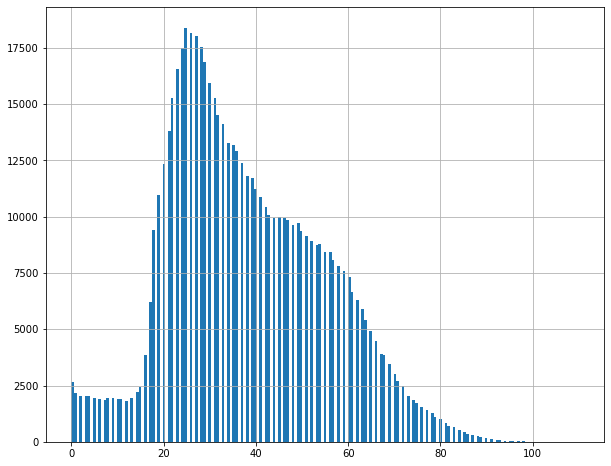

In [82]:
X_train[X_train.AGE >= 0].AGE.hist(figsize=(10, 8), bins='auto');

In [83]:
X_train[X_train.AGE == 0]

,PERSON_TYPE,SEAT_NO,STATE,SEX,AGE,DRIVERS_LICENSE_CLASS,SAFETY_EQUIPMENT,AIRBAG_DEPLOYED,EJECTION,DRIVER_ACTION,...,HIT_AND_RUN_I,DAMAGE,PRIM_CONTRIBUTORY_CAUSE,SEC_CONTRIBUTORY_CAUSE,BEAT_OF_OCCURRENCE,NUM_UNITS,CRASH_HOUR,CRASH_DAY_OF_WEEK,CRASH_MONTH,CRASH_YEAR
819325,PEDESTRIAN,NaN,IL,M,0.0,NaN,USAGE UNKNOWN,NaN,NaN,UNKNOWN,...,NaN,"$501 - $1,500",FAILING TO YIELD RIGHT-OF-WAY,UNABLE TO DETERMINE,1711.0,2.0,11,2,12,2019
870260,PASSENGER,6.0,IL,M,0.0,NaN,CHILD RESTRAINT USED,DID NOT DEPLOY,NONE,NaN,...,Y,$500 OR LESS,UNABLE TO DETERMINE,UNABLE TO DETERMINE,731.0,2.0,19,1,10,2015
59101,PASSENGER,6.0,IL,M,0.0,NaN,CHILD RESTRAINT - REAR FACING,DID NOT DEPLOY,NONE,NaN,...,NaN,"$501 - $1,500",FAILING TO YIELD RIGHT-OF-WAY,UNABLE TO DETERMINE,1124.0,2.0,9,4,6,2020
874412,PASSENGER,5.0,NaN,F,0.0,NaN,CHILD RESTRAINT USED,NOT APPLICABLE,NONE,NaN,...,NaN,"OVER $1,500",UNABLE TO DETERMINE,UNABLE TO DETERMINE,1232.0,2.0,14,2,10,2018
117265,PASSENGER,6.0,WI,M,0.0,NaN,CHILD RESTRAINT USED,DID NOT DEPLOY,NONE,NaN,...,NaN,"$501 - $1,500",FOLLOWING TOO CLOSELY,UNABLE TO DETERMINE,2412.0,2.0,15,4,6,2018
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1138551,PASSENGER,10.0,IL,F,0.0,NaN,CHILD RESTRAINT - TYPE UNKNOWN,DID NOT DEPLOY,NONE,NaN,...,NaN,"OVER $1,500",EQUIPMENT - VEHICLE CONDITION,NOT APPLICABLE,724.0,1.0,16,5,4,2021
544836,PEDESTRIAN,NaN,IL,M,0.0,NaN,USAGE UNKNOWN,NaN,NaN,UNKNOWN,...,NaN,"$501 - $1,500",UNABLE TO DETERMINE,UNABLE TO DETERMINE,1922.0,2.0,17,6,9,2018
919272,PASSENGER,4.0,NaN,F,0.0,NaN,CHILD RESTRAINT - REAR FACING,DID NOT DEPLOY,NONE,NaN,...,NaN,$500 OR LESS,DRIVING SKILLS/KNOWLEDGE/EXPERIENCE,NOT APPLICABLE,2012.0,2.0,19,7,7,2019
146620,PASSENGER,3.0,IL,F,0.0,NaN,SAFETY BELT USED,DID NOT DEPLOY,NONE,NaN,...,NaN,"OVER $1,500",UNABLE TO DETERMINE,NOT APPLICABLE,2515.0,2.0,19,3,7,2020


In [84]:
# # Set all SEAT_NO = 1 if PERSON_TYPE = 'DRIVER'
# X_train['SEAT_NO'][X_train.PERSON_TYPE == 'DRIVER'] = 1

In [85]:
# X_train.loc[X_train['SEAT_NO'].isna()]['PERSON_TYPE'].value_counts()

In [86]:
# # Fill rest of NaN values in SEAT_NO with 0
# X_train['SEAT_NO'].fillna(value=0, inplace=True)

In [87]:
# X_train['SEAT_NO'].isna().sum()

In [88]:
X_train.loc[(X_train.AGE==0) & (X_train.PERSON_TYPE == 'DRIVER')]

,PERSON_TYPE,SEAT_NO,STATE,SEX,AGE,DRIVERS_LICENSE_CLASS,SAFETY_EQUIPMENT,AIRBAG_DEPLOYED,EJECTION,DRIVER_ACTION,...,HIT_AND_RUN_I,DAMAGE,PRIM_CONTRIBUTORY_CAUSE,SEC_CONTRIBUTORY_CAUSE,BEAT_OF_OCCURRENCE,NUM_UNITS,CRASH_HOUR,CRASH_DAY_OF_WEEK,CRASH_MONTH,CRASH_YEAR
